***

# Plant Growth Data Analysis with t-Test and ANOVA

***

![Plant Growth](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Echinochloa_crusgalli_habit3_-_Flickr_-_Macleay_Grass_Man.jpg/800px-Echinochloa_crusgalli_habit3_-_Flickr_-_Macleay_Grass_Man.jpg)

## Description:

This project involves performing a statistical analysis of plant growth data using Python. The dataset, [PlantGrowth](https://vincentarelbundock.github.io/Rdatasets/), provides information on the weight of plants grown under different conditions (a control group and two experimental groups). The main objectives of the project are:

1. Describe the dataset and conduct a preliminary analysis.
2. Explain the concept of a t-test, its assumptions, and its applications.
3. Perform a t-test to determine if there are statistically significant differences in plant weight between the two experimental groups (trt1 and trt2).
4. Explain the ANOVA method, its advantages, and its use cases.
5. Perform a one-way Analysis of Variance (ANOVA) to test if there are differences in the mean plant weights across the three groups (ctrl, trt1, and trt2).
6. Discuss why ANOVA is preferable to conducting multiple t-tests when comparing more than two groups.


***

## Description of the dataset 

[Results from an Experiment on Plant Growth(DEscription)](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html)

> Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions.
> 
> **Usage**  
> `PlantGrowth`  

> **Format**  
> A data frame of 30 cases on 2 variables:  
> - `[, 1] weight` - Numeric  
> - `[, 2] group` - Factor 
>  
> The levels of the group are: `ctrl`, `trt1`, and `trt2`.  

> **Source**  
> Dobson, A. J. (1983). *An Introduction to Statistical Modelling*. London: Chapman and Hall.



***

## Import libraries 

- [Pandas](https://pandas.pydata.org/docs/)
- [Matplotlib](https://matplotlib.org/stable/contents.html)
- [Statistical functions (scipy.stats)](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Seaborn: statistical data visualization](https://seaborn.pydata.org/#seaborn-statistical-data-visualization)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway

## Load data 

In [3]:
plant_df = pd.read_csv("./data/PlantGrowth.csv")

plant_df

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


## Display summary statistic 

In [9]:
plant_df.groupby('group')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
ctrl,10.0,5.032,0.583091,4.17,4.5500,5.155,5.2925,6.11
trt1,10.0,4.661,0.793676,3.59,4.2075,4.550,4.8700,6.03
trt2,10.0,5.526,0.442573,4.92,5.2675,5.435,5.7350,6.31


### Brief summary of the descriptive statistics for the `weight` variable grouped by treatment groups (ctrl, trt1, trt2):

**`trt2`** has the highest mean weight, followed by the **`ctrl`** group, with **`trt1`** having the lowest mean weight.  
**`trt1`** shows the largest variability in weight, as indicated by its higher standard deviation (0.79), whereas **`trt2`** shows the least variability with a standard deviation of 0.44.  
The spread of weights (range and interquartile range) is narrower in **`trt2`**, suggesting more consistent results within this group.  
These insights provide a good starting point for further statistical analysis, such as ANOVA, to test for significant differences between the groups.


***

## Visualize the data

### Boxplot of `weight` grouped by treatment

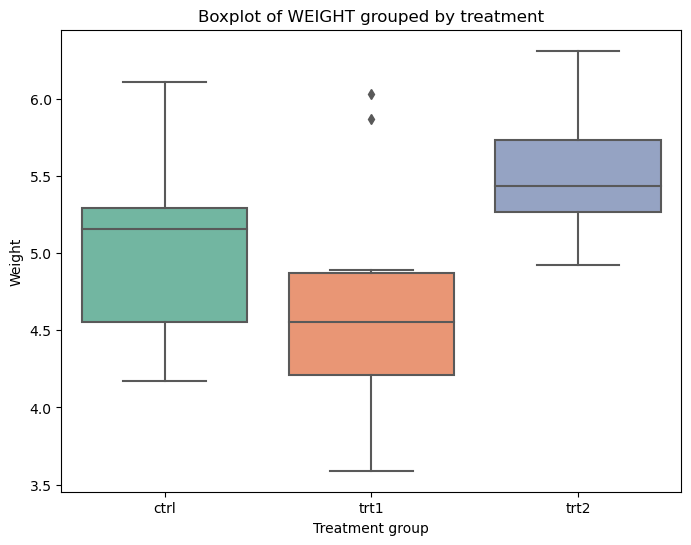

In [17]:
fig, ax = plt.subplots(figsize=(8, 6)) 
sns.boxplot(x='group', y='weight', data=plant_df, palette='Set2', ax=ax)

ax.set_title('Boxplot of WEIGHT grouped by treatment')
ax.set_xlabel('Treatment group')
ax.set_ylabel('Weight');

### Strip plot to show the distribution of `weight`

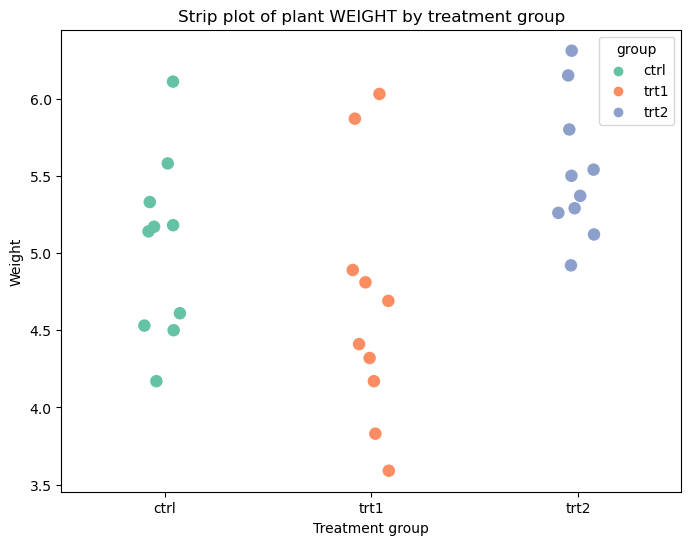

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.stripplot(data=plant_df, x='group', y='weight', jitter=True, ax=ax, hue='group', palette='Set2', size=9)

ax.set_title('Strip plot of plant WEIGHT by treatment group')
ax.set_xlabel('Treatment group')
ax.set_ylabel('Weight');

***

# END